<h2 style='color:pink; font-size: 50px;' align='center'>Machine Learning - Assignment 6</h2>

<h2 style='color:pink; font-size: 20px;' align='center'>Cindy Jeon(section 2, group 7 : Mia Lai/Saadh)</h2>


In [274]:
# necessary imports

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings("ignore")

# 1. Fundamentals data set

### a) Load the data and drop 'Ticker Symbol’, ‘Period Ending’, ‘For Year' and drop NA


In [275]:
# Read the datasets
df = pd.read_csv("/Users/daeunjeon/Library/CloudStorage/GoogleDrive-jeond000@gmail.com/My Drive/MSBA UC DAVIS/Winter 2023/ BAX 452_Machine_Learning/HW/HW6/fundamentals.csv")
df.head(5)

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [276]:
# Count of the missing values of the dataset
missing_values = df.isna().sum()
missing_values

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

In [277]:
# caclulate the percentage of missing values
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / df.shape[0] * 100
print(missing_values)

Cash Ratio                      16.788321
Current Ratio                   16.788321
Quick Ratio                     16.788321
For Year                         9.713644
Earnings Per Share              12.296463
Estimated Shares Outstanding    12.296463
dtype: float64


### #cleaning the data

In [278]:
# 1) drop 'Ticker Symbol’, ‘Period Ending’, ‘For Year' for X
df = df.drop(['Ticker Symbol', 'Period Ending', 'For Year','Unnamed: 0'], axis=1)

# 2) drop the rows with missing values
df = df.dropna()

display(df.head(5))

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,-5.60,3.350000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,-11.25,1.630222e+08
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,4.322500e+10,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,4.02,7.169154e+08
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,4.841500e+10,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,11.39,6.681299e+08
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,4.613814e+09,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,5.29,7.328355e+07


In [279]:
# Count of the missing values of the dataset to make sure there is no missing values
missing_values = df.isna().sum()
missing_values

Accounts Payable                0
Accounts Receivable             0
Add'l income/expense items      0
After Tax ROE                   0
Capital Expenditures            0
                               ..
Total Liabilities & Equity      0
Total Revenue                   0
Treasury Stock                  0
Earnings Per Share              0
Estimated Shares Outstanding    0
Length: 75, dtype: int64

### b). Split data set with 70% train and 30% test then build random forest model.  Default every (hyper-)parameter then compute MSE. (15 pts)

### # Prepare to run random forest

In [314]:
# drop 'Ticker Symbol’, ‘Period Ending’, ‘For Year' for X
X = df.drop(['Estimated Shares Outstanding'], axis=1)
y = df['Estimated Shares Outstanding']

In [315]:
# Split data set with 70% train and 30% test then build random forest model and Default every (hyper-)parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Train the randome forest model with np.random.seed(seed=5566)
np.random.seed(seed=5566)
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Predict the test data
y_pred_test = model.predict(X_test)

# then compute MSE.
mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE test:', mse_test)

MSE test: 1.3944162926936726e+17


### c) Build random forest with min_samples_split set to 3.  Compare with random forest model in (b).  Explain. (15 pts)

In [317]:
#Build random forest with min_samples_split set to 3(using the same train and test data set as above) and compute MSE. (15 pts)
np.random.seed(seed=5566)
model_min_3 = RandomForestRegressor(min_samples_split=3)
model_min_3.fit(X_train, y_train)
y_pred_min_3 = model.predict(X_test)
mse_test_min_3 = mean_squared_error(y_test, y_pred_min_3)
print('MSE_test:', mse_test_min_3)

MSE_test: 1.4017178849403554e+17


#### # Explain : 

The lower MSE of 1.3944162926936726e+17 with the default setting compared to  1.4017178849403554e+17 with min_samples_split=3 shows that the default settings for the decision tree slightly outperformed the model with a slight restriction in terms of average squared errors. It could mean that min_samples_split has underfitting issue. This also indicates that for the fundamental dataset, the default setting gives a better balance between learning from the training data and generalizing to new data. However,such a small difference in MSE means that both models are relatively similar in how they fit the data.

### d) Use "Mean Decrease in Impurity" and "Permutation Feature Importance" to compute the variable importance of the random forest in (c).  Explain how each method computes the variable importance and compare their results. (15 pts)

In [318]:
# Mean Decrease in Impurity
importances = model_min_3.feature_importances_
indices = np.argsort(importances)[::-1]
print("Mean Decrease in Impurity")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Mean Decrease in Impurity
1. feature 70 (0.201173)
2. feature 65 (0.165811)
3. feature 68 (0.148126)
4. feature 16 (0.088448)
5. feature 35 (0.070695)
6. feature 64 (0.049076)
7. feature 73 (0.022566)
8. feature 41 (0.018596)
9. feature 44 (0.018517)
10. feature 49 (0.014998)
11. feature 15 (0.012469)
12. feature 31 (0.011059)
13. feature 48 (0.009083)
14. feature 11 (0.007580)
15. feature 47 (0.007394)
16. feature 5 (0.007380)
17. feature 46 (0.006859)
18. feature 52 (0.006619)
19. feature 21 (0.006583)
20. feature 12 (0.006406)
21. feature 62 (0.006277)
22. feature 50 (0.005902)
23. feature 38 (0.005836)
24. feature 22 (0.004763)
25. feature 9 (0.004051)
26. feature 40 (0.003793)
27. feature 10 (0.003637)
28. feature 7 (0.003419)
29. feature 30 (0.003356)
30. feature 69 (0.003316)
31. feature 36 (0.003194)
32. feature 6 (0.003148)
33. feature 59 (0.003145)
34. feature 43 (0.003117)
35. feature 67 (0.002767)
36. feature 61 (0.002705)
37. feature 24 (0.002697)
38. feature 66 (0.002629)

In [319]:
# permuation feature importance
from sklearn.inspection import permutation_importance
result = permutation_importance(model_min_3, X_test, y_test, n_repeats=30, random_state=0)
print("Permutation Feature Importance")
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{X.columns[i]:<8}"
              f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")
        

Permutation Feature Importance
Earnings Per Share0.124 +/- 0.011
Total Liabilities & Equity0.052 +/- 0.012
Other Equity0.050 +/- 0.009
Total Equity0.044 +/- 0.008
Net Cash Flow-Operating0.043 +/- 0.008
Total Assets0.040 +/- 0.010
Cost of Revenue0.013 +/- 0.003
Research and Development0.011 +/- 0.002
Sales, General and Admin.0.011 +/- 0.004
Deferred Asset Charges0.010 +/- 0.004
Gross Profit0.009 +/- 0.001
Add'l income/expense items0.005 +/- 0.001
Capital Surplus0.005 +/- 0.001
Net Income-Cont. Operations0.005 +/- 0.002
Retained Earnings0.004 +/- 0.001
Net Income Applicable to Common Shareholders0.004 +/- 0.001
Cash Ratio0.004 +/- 0.001
Net Income0.004 +/- 0.002
Interest Expense0.002 +/- 0.001
Other Operating Activities0.002 +/- 0.001
Fixed Assets0.002 +/- 0.000
Total Current Assets0.002 +/- 0.000
Capital Expenditures0.002 +/- 0.000
Cash and Cash Equivalents0.002 +/- 0.001
Depreciation0.001 +/- 0.000
Other Operating Items0.000 +/- 0.000


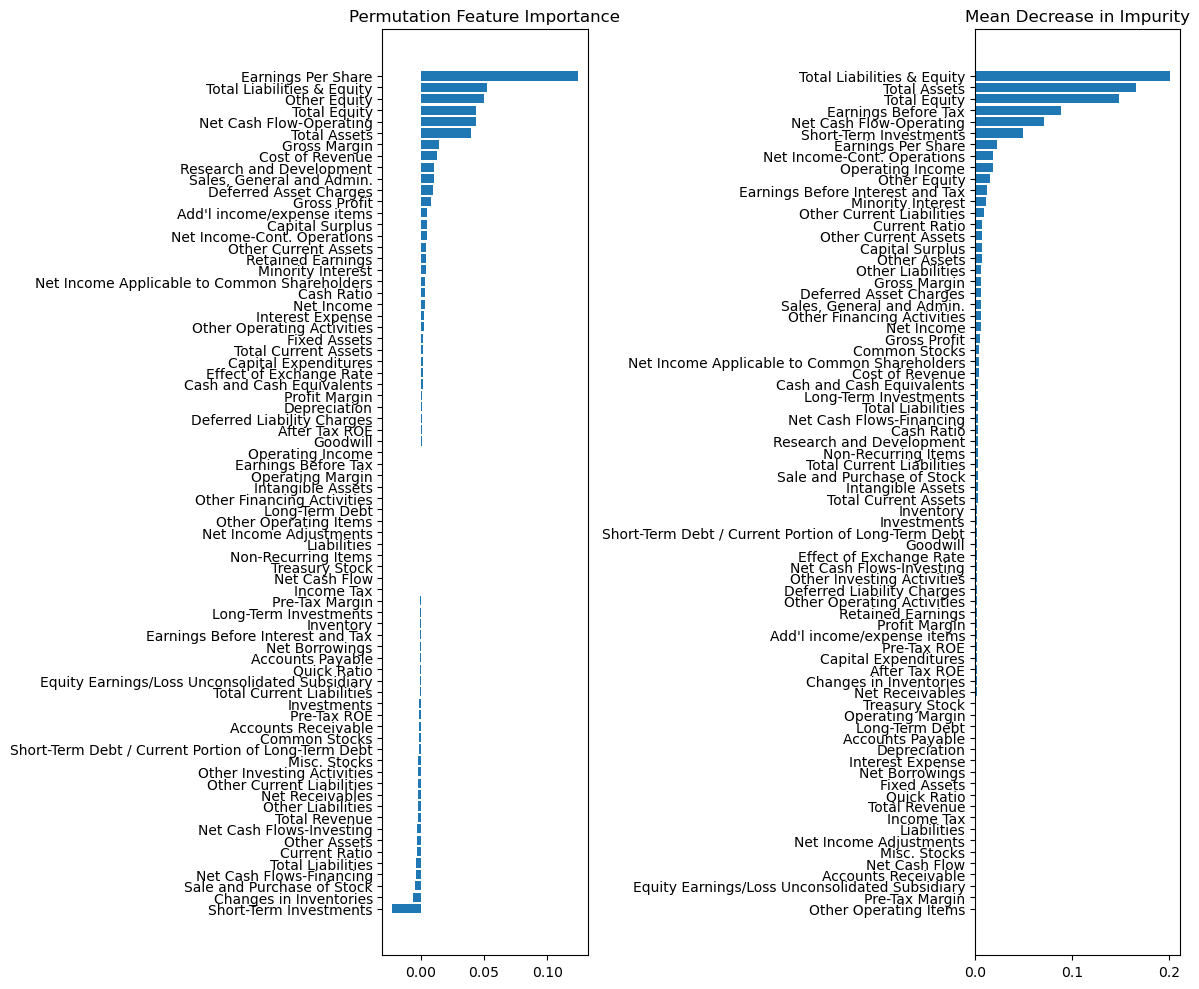

In [325]:
#draw  plot for the permutation feature importance and feature importance based on mean decrease in impurity in asending order

# Sort Permutation Feature Importance in ascending order
perm_sorted_idx = np.argsort(result.importances_mean)
perm_sorted_importance = result.importances_mean[perm_sorted_idx]
perm_sorted_features = X.columns[perm_sorted_idx]

# Sort Mean Decrease in Impurity in ascending order
mdi_sorted_idx = np.argsort(importances)
mdi_sorted_importance = importances[mdi_sorted_idx]
mdi_sorted_features = X.columns[mdi_sorted_idx]

# Draw plot for the permutation feature importance in ascending order
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
ax[0].set_title('Permutation Feature Importance')
ax[0].barh(perm_sorted_features, perm_sorted_importance)

# Draw plot for the mean decrease in impurity in ascending order
ax[1].set_title('Mean Decrease in Impurity')
ax[1].barh(mdi_sorted_features, mdi_sorted_importance)

plt.tight_layout()
plt.show()




### # Compare the results : 
-  For permutation feature importance, earning per share is the most important feature while total liability and equity for mean decrease equity. however, their top5 features are very similar. permutation feature.
### # How each method computes : 
- 1) permutation : This method evaluates the increase in the model's prediction error after permuting the feature's values, which breaks the association between the feature and the target. it measure how much the model's accuracy decreases when the information of the feature is destroyed. This is done by randomly shuffling each feature column in the test dataset and measuring the change in the model's accuracy.
-  2) Mean Decrease : This method computes the importance of a feature by summing the decrease in impurity attributed to each feature across all trees in the forest. For each feature, whenever it is used to split a node, the decrease in impurity is calculated and added to the importance of the feature.

### e) Use the same split to build lasso regression.  Compare with last model (c). (15 pts)

In [299]:
lasso_reg = linear_model.Lasso(alpha=1000)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=1000)

In [300]:
# run X test on lasso to predct y
y_pred_lasso = lasso_reg.predict(X_test)

#compute MSE
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("MSE:", mse_lasso)

MSE: 2.148880093938834e+17


#### # Explain : 
Lasso model has the highest MSE among all the models. Indicating randomforest performs better than lasso for this data set. 

# 2. Decision Tree Classification 

### a). Decision Tree Classification. Use the breast cancer dataset to build decision tree classifier to predict the diagnosis.  Split the data into 70% train and 30% test. (10 pts) (Default every parameter)

In [327]:
# Read the datasets for breast cancer
df_2 = pd.read_csv("/Users/daeunjeon/Library/CloudStorage/GoogleDrive-jeond000@gmail.com/My Drive/MSBA UC DAVIS/Winter 2023/ BAX 452_Machine_Learning/HW/HW2/Cancer.csv")
df_2.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [328]:
#Mapping diagnosis labels 
df_2['diagnosis'] = df_2['diagnosis'].map({'M': 1, 'B': 0}) # encoding my values as malignant for 1 and benign for 0
print(df_2['diagnosis'])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


### #cleaning the data

In [329]:
# Count of the missing values of the dataset
missing_values = df_2.isna().sum()
missing_values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [330]:
# data cleaning1: remove any Unnamed columns 
df_2 = df_2.loc[:, ~df_2.columns.str.contains('^Unnamed')]

# data cleaning2: Cleaning the missing values
df_2 = df_2.dropna(how='any')

# data cleaning3: Handling duplicated values and outliers
df_2 = df_2.drop_duplicates() # clean all duplicated values

### # getting rid of variables that have high correlation

In [331]:
##checking correlaton
corr = df_2.corr()
corr.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019


In [332]:
# Select correlations greater than 0.9 (absolute value for both positive and negative correlations)
high_corr = np.where(np.abs(corr) > 0.9)

# Create a set of column names to drop (excluding the diagonal elements from the correlation matrix)
to_drop = set([corr.columns[x] for x, y in zip(*high_corr) if x != y and x < y])

# Drop the columns from the DataFrame
df_reduced = df_2.drop(columns=to_drop)

# df_reduced now contains the DataFrame with highly correlated variables removed
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   symmetry_mean            569 non-null    float64
 5   fractal_dimension_mean   569 non-null    float64
 6   texture_se               569 non-null    float64
 7   area_se                  569 non-null    float64
 8   smoothness_se            569 non-null    float64
 9   compactness_se           569 non-null    float64
 10  concavity_se             569 non-null    float64
 11  concave points_se        569 non-null    float64
 12  symmetry_se              569 non-null    float64
 13  fractal_dimension_se     569 non-null    float64
 14  texture_worst            5

In [338]:
# Prepare X and Y
X = df_reduced.drop(['diagnosis','id'], axis=1)             
y = df_reduced['diagnosis']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#build decision tree classifier
np.random.seed(seed=5566)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# compute accuracy.
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# compute mse
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

Accuracy: 0.9122807017543859
MSE: 0.08771929824561403


#### # Insights : 
accuracy is  91% and MSE is 0.087 indicates this model is very well performing.

### b) Print Confusion matrix and explain.  Hint:  A confusion matrix is a table used in machine learning to visualize the performance of a classification model by showing the actual vs. predicted values, helping to identify the types of errors made by the model.  Typically, the actual labels are on the vertical axis (rows), and the predicted labels are on the horizontal axis (columns). (10 pts)

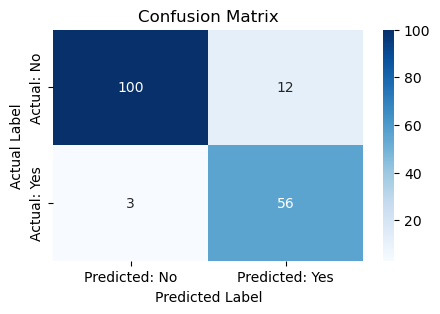

In [343]:
# Calculate confusion matrix
conf_matrix_values = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix values
conf_matrix_df = pd.DataFrame(conf_matrix_values, 
                              index=['Actual: No', 'Actual: Yes'], 
                              columns=['Predicted: No', 'Predicted: Yes'])

# Plot using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#### # Insights : 

The first row represents the actual negatives (the true class is "No"):
- True Negatives (TN): 100 instances were correctly predicted as "No".
- False Positives (FP): 12 instances were incorrectly predicted as "Yes" (these are actual "No"s).

The second row represents the actual positives (the true class is "Yes"):
- False Negatives (FN): 3 instances were incorrectly predicted as "No" (these are actual "Yes"s).
- True Positives (TP): 561 instances were correctly predicted as "Yes".

### c). Visualize the tree.  What variables are in the plot? (10 pts)

In [344]:
print(X.columns)

Index(['smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


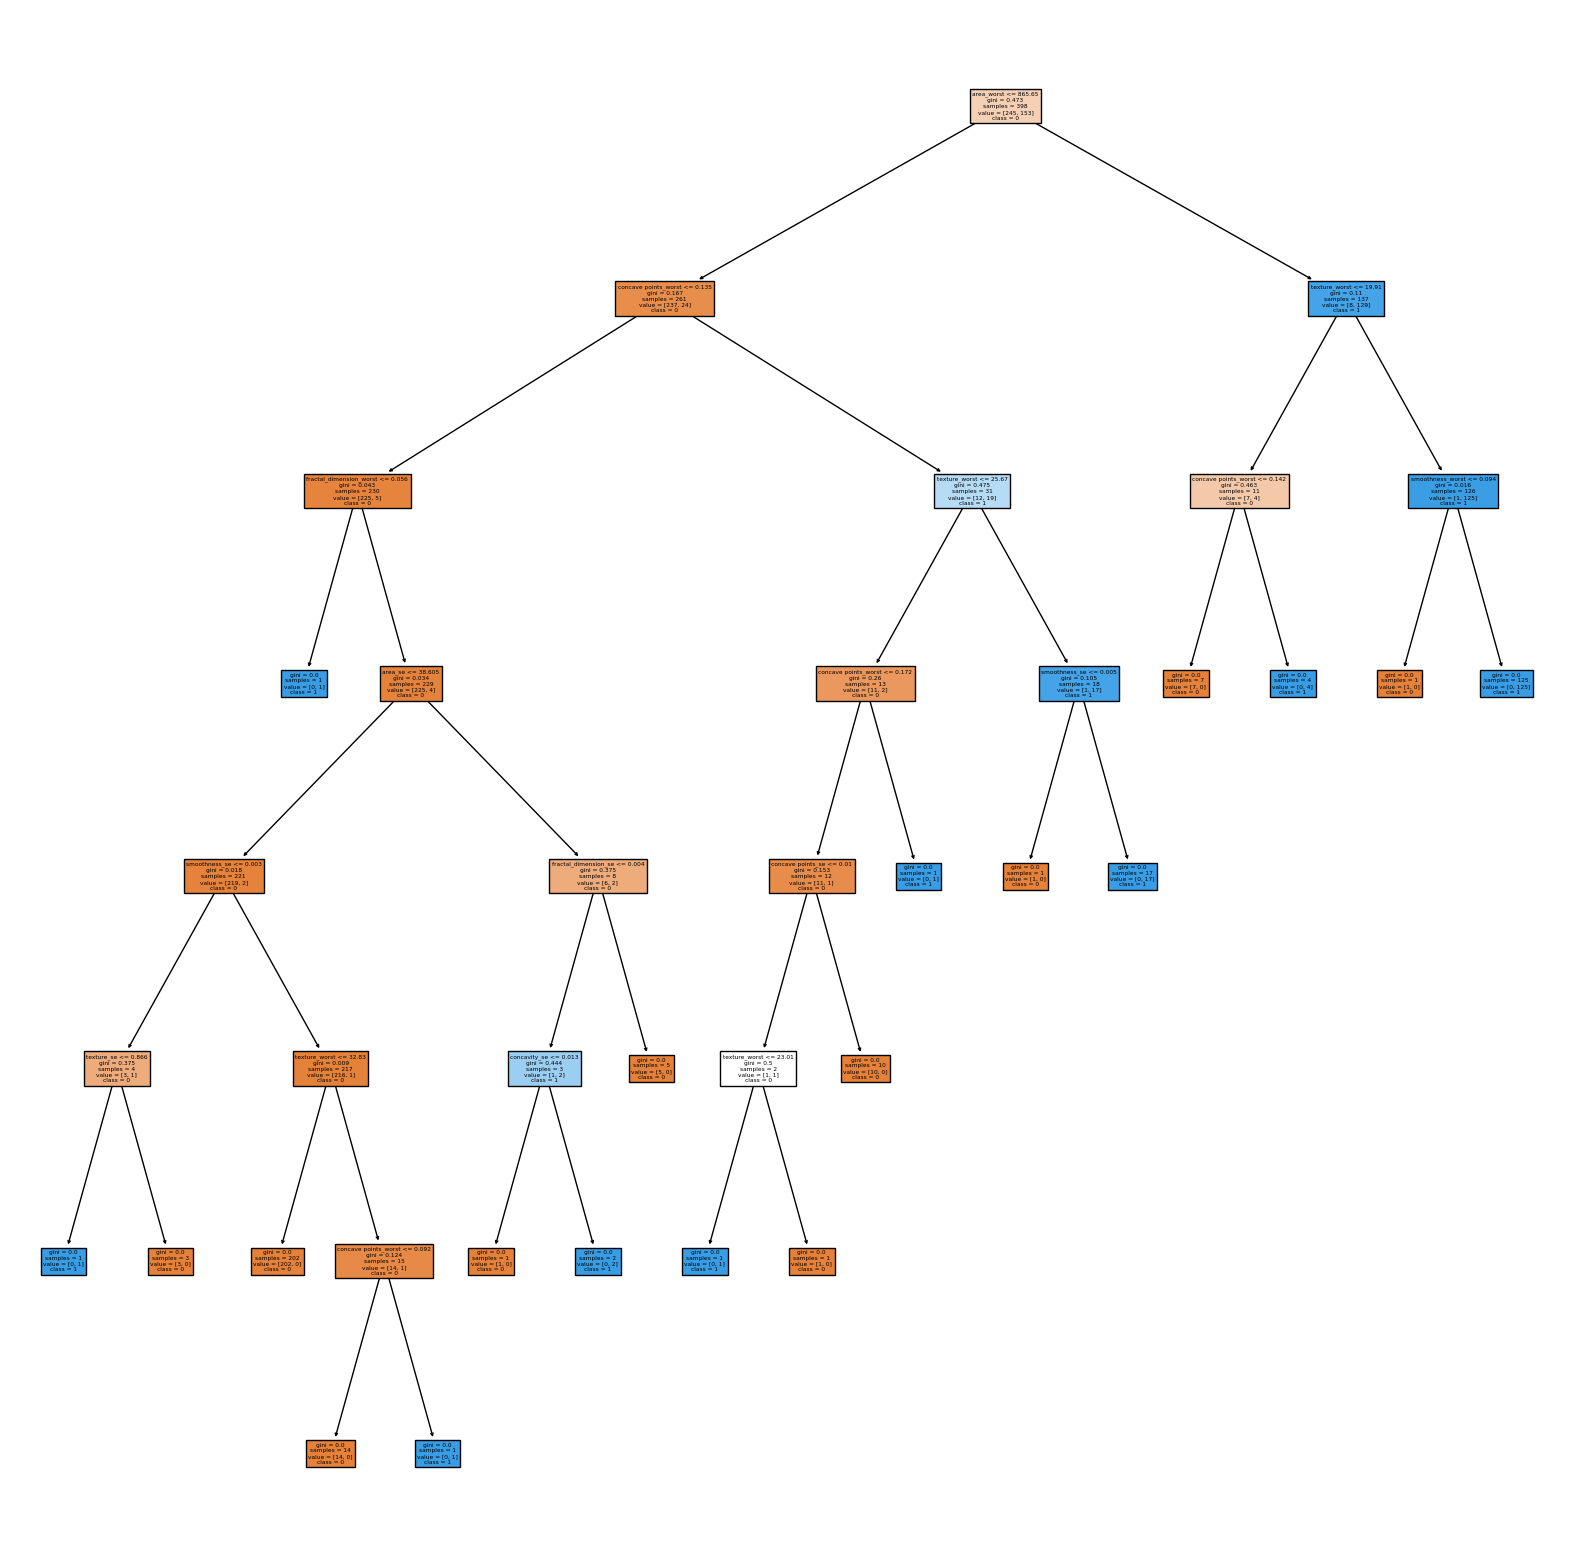

In [347]:
# prepare feature names
feature_names = ['smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Draw the decision tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=['0','1'])
plt.show()


#### #Insights : 
There are 19 features such as, smoothness_mean', 'compactness_mean', 'symmetry_mean','fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'texture_worst', 'area_worst','smoothness_worst', 'compactness_worst', 'concavity_worst','concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'. 

In the tree, I see, Gini, samples, value, class

### d) No code required:  would you consider pruning this tree?  Why?  Where?  Explain how you would go about deciding where to prune the tree?  What measures would you use? (10 pts)

#### #Insights : 
I definately think I would prunning the tree, it looks like over fitting. I would use the min_samples_split and set it about 2 or 3 to have some restriction on the tree and prevent overfitting and generalize better.